In [1]:
# Import packages.
using Turing
using StatsPlots

In [2]:
# Declare Functions 
√(x) = sqrt(x)
𝑵(m,sd) = Normal(m, sd)

𝑵 (generic function with 1 method)

In [3]:
# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
    σ² ~ InverseGamma(2, 3)
    m ~ 𝑵(0, √(σ²))
    x ~ 𝑵(m, √(σ²))
    y ~ 𝑵(m, √(σ²))
end

gdemo (generic function with 2 methods)

In [5]:
#  Run sampler, collect results.
c3 = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

Chains MCMC chain (1000×12×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.04 seconds
Compute duration  = 0.04 seconds
parameters        = σ², m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          σ²    2.0541    1.6558    0.1338   168.4866   344.3843    0.9994     ⋯
           m    1.1425    0.8485    0.0892    94.7984   135.2833    1.0001     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          σ²    0.5779    1.0358    1.5047    2.4548  

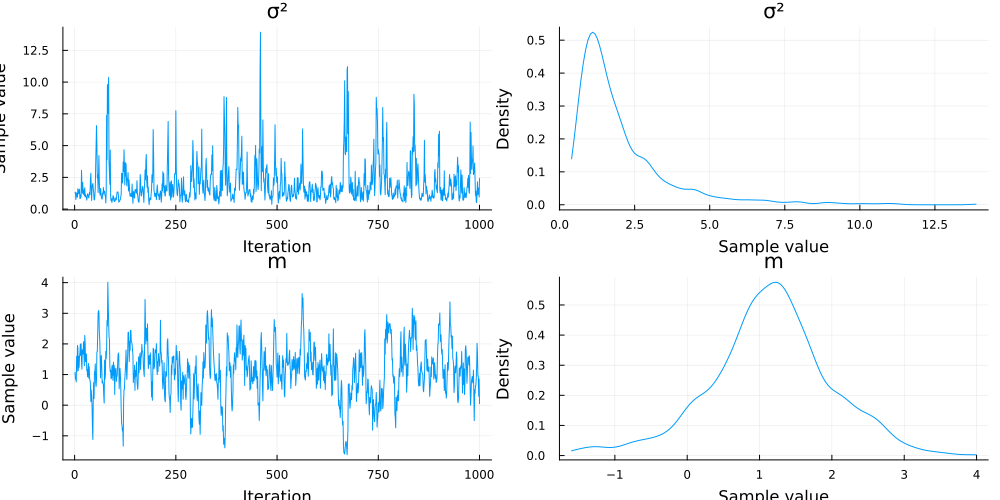

In [9]:
# Summarise results
describe(c3)

# Plot results
plot(c3)
# savefig("images/gdemo-plot.png")

# References
- [ ] [Turing.jl Guide](https://turing.ml/v0.21/docs/using-turing/guide)
- [ ] [Inverse-gamma distribution](https://en.wikipedia.org/wiki/Inverse-gamma_distribution)